# Justified Referral in AI Glaucoma Screening

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
!wget "https://zenodo.org/record/10035093/files/JustRAIGS_Train_labels.csv"

--2024-04-15 13:55:05--  https://zenodo.org/record/10035093/files/JustRAIGS_Train_labels.csv
Resolving zenodo.org (zenodo.org)... 188.185.79.172, 188.184.98.238, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.185.79.172|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/10035093/files/JustRAIGS_Train_labels.csv [following]
--2024-04-15 13:55:06--  https://zenodo.org/records/10035093/files/JustRAIGS_Train_labels.csv
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 9205084 (8.8M) [text/plain]
Saving to: ‘JustRAIGS_Train_labels.csv’

JustRAIGS_Train_lab 100%[===================>]   8.78M   522KB/s    in 18s     

2024-04-15 13:55:24 (512 KB/s) - ‘JustRAIGS_Train_labels.csv’ saved [9205084/9205084]



In [5]:
pip install gdown

Defaulting to user installation because normal site-packages is not writeable
  Using cached gdown-5.1.0-py3-none-any.whl (17 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 KB 4.3 MB/s eta 0:00:00
  Using cached soupsieve-2.5-py3-none-any.whl (36 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import gdown
gdown.download('https://drive.google.com/uc?id=16W842tGVVIrf-phN9msf4m-lRTvuyDAW', 'combine.zip', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=16W842tGVVIrf-phN9msf4m-lRTvuyDAW
From (redirected): https://drive.google.com/uc?id=16W842tGVVIrf-phN9msf4m-lRTvuyDAW&confirm=t&uuid=e883b5df-3e4b-48fa-b1bc-7a7a1e3acc17
To: /home/iiitd/Downloads/combine.zip
100%|██████████| 1.88G/1.88G [00:39<00:00, 47.0MB/s]


'combine.zip'

In [7]:
!unzip -nq 'combine.zip' -d 'images'

In [8]:
!ls 'images/combine' -l | wc -l

101424


## Start here

Importing libraries

In [10]:
pip install tensorflow numpy pandas scikit-learn seaborn 

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 10.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 109.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 KB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 79.8 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 69.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.2 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 35.0 MB/s eta 0:00:00

In [12]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 46.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
import os, random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import keras
# from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import keras.layers as layers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

 Set the seed for reproducibility for all the libraries

In [14]:
seed= 1
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

Load the dataset<br>
Load the CSV file

In [15]:
data = pd.read_csv('JustRAIGS_Train_labels.csv', delimiter=';')
# data = data[:17400]
data.head()

,Eye ID,Final Label,Fellow Eye ID,Age,Label G1,Label G2,Label G3,G1 ANRS,G1 ANRI,G1 RNFLDS,...,G3 ANRS,G3 ANRI,G3 RNFLDS,G3 RNFLDI,G3 BCLVS,G3 BCLVI,G3 NVT,G3 DH,G3 LD,G3 LC
0,TRAIN000000,NRG,TRAIN081848,48.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TRAIN000001,NRG,TRAIN018312,29.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRAIN000002,NRG,TRAIN083822,61.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TRAIN000003,NRG,TRAIN055721,70.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TRAIN000004,NRG,TRAIN099283,48.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Preprocess the dataset<br>
Check for missing values

In [16]:
data.iloc[:,:4].isnull().sum()

Eye ID              0
Final Label         0
Fellow Eye ID    8406
Age                14
dtype: int64

Handle missing values in the 'Age' column

In [17]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data.iloc[:,:4].isnull().sum()

Eye ID              0
Final Label         0
Fellow Eye ID    8406
Age                 0
dtype: int64

Check for class imbalance

Final Label
NRG    98153
RG      3270
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Final Label'>

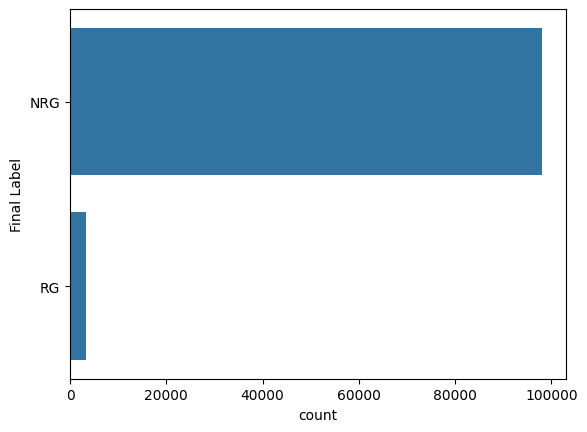

In [18]:
print(data['Final Label'].value_counts())
sns.countplot(data['Final Label'])

Visualize the dataset

Create a column 'File Path' in the dataframe

In [19]:
image_directory= 'images/combine'
def get_extension(eye_id):
    for ext in ['.JPG', '.JPEG', '.PNG']:  # Check for common image extensions
        image_path = os.path.join(image_directory, f"{eye_id}{ext}")
        if os.path.exists(image_path):
            return f"{ext}"
    print(f"Image not found for {eye_id}")
    return None

In [20]:
# add column File Path
data['Extention'] = data['Eye ID'].apply(lambda x: get_extension(x))
data['File Path'] = 'images/combine/' + data['Eye ID'] + data['Extention']

In [21]:
data

,Eye ID,Final Label,Fellow Eye ID,Age,Label G1,Label G2,Label G3,G1 ANRS,G1 ANRI,G1 RNFLDS,...,G3 RNFLDS,G3 RNFLDI,G3 BCLVS,G3 BCLVI,G3 NVT,G3 DH,G3 LD,G3 LC,Extention,File Path
0,TRAIN000000,NRG,TRAIN081848,48.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.JPG,images/combine/TRAIN000000.JPG
1,TRAIN000001,NRG,TRAIN018312,29.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.JPG,images/combine/TRAIN000001.JPG
2,TRAIN000002,NRG,TRAIN083822,61.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.JPG,images/combine/TRAIN000002.JPG
3,TRAIN000003,NRG,TRAIN055721,70.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.JPG,images/combine/TRAIN000003.JPG
4,TRAIN000004,NRG,TRAIN099283,48.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.JPG,images/combine/TRAIN000004.JPG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101418,TRAIN101437,NRG,TRAIN096656,57.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.JPG,images/combine/TRAIN101437.JPG
101419,TRAIN101438,NRG,TRAIN078075,52.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.JPG,images/combine/TRAIN101438.JPG
101420,TRAIN101439,NRG,TRAIN056754,49.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.JPG,images/combine/TRAIN101439.JPG
101421,TRAIN101440,NRG,TRAIN040796,44.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.JPG,images/combine/TRAIN101440.JPG


In [22]:
import matplotlib.image as mpimg
def crop_rgb(img_path):

    # Load the image
    img = plt.imread(img_path)

    # Initialize crop boundaries to cover the entire image
    top, bottom, left, right = 0, img.shape[0], 0, img.shape[1]
    centre = img.shape[0] // 2, img.shape[1] // 2

    # Find the leftmost non-black column
    for i in range(centre[1], -1, -1):
        if np.sum(img[centre[0], i, :]) < 10:  # Assuming non-black pixels have a sum greater than 10
            left_shift = centre[1] - i
            break

    # Find the rightmost non-black column
    for i in range(centre[1], img.shape[1]):
        if np.sum(img[centre[0], i, :]) < 10:
            right_shift = i - centre[1]
            break

    # Update the crop boundaries
    shift= max(left_shift, right_shift)
    left = centre[1] - shift
    right = centre[1] + shift

    # Crop in a 3:5 ratio
    width = right - left
    new_height = int(width * 0.60)
    centre = img.shape[0] // 2
    top = max(0, centre - (new_height // 2))
    bottom = min(img.shape[0], centre + (new_height // 2))

    # Crop the image
    cropped_img = img[top:bottom, left:right, :]

    # Convert the cropped image to grayscale
    # grayscale_img = np.dot(cropped_img[..., :3], [0.2989, 0.5870, 0.1140])

    # Display the cropped image
    # plt.imshow(cropped_img)
    # plt.axis('off')
    # plt.show()

    # return cropped image
    return cropped_img

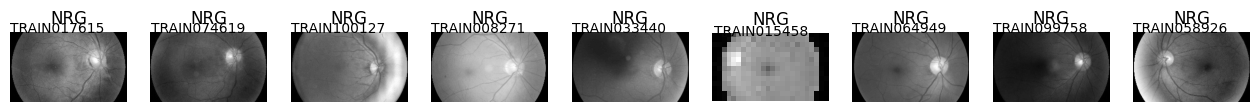

In [23]:
plt.figure(figsize=(16, 10))
for i in range(9):
    plt.subplot(1, 9, i+1)
    try:
        index= random.randint(0, len(data))
        # img = plt.imread(data.loc[index, 'File Path'])
        # crop the image to 3:4 aspect ratio from the center
        # img = img[0: int(img.shape[0]*3/4), :]

        # img= crop_rgb(data['File Path'][index])
        img_path = 'images/combine/' + data['Eye ID'][index] + data['Extention'][index]
        img= crop_rgb(img_path)
        # convert to grayscale
        # img = plt.imread(img_path)
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        cv2.imwrite(f'temp/{index}.jpg', gray_img)
        plt.imshow(gray_img, cmap='gray')
        plt.axis('off')
        plt.title(data['Final Label'][index])
        plt.text(0, 0, data['Eye ID'][index])
    except:
        print('Error: '+ 'images/combine/' + data['Eye ID'][index] + data['Extention'][index])
plt.show()

In [24]:
# !rm -rf 'cropped_images'

In [25]:
# crop all images and save them in a new directory
new_directory= 'cropped_images'
if not os.path.exists(new_directory):
    os.makedirs(new_directory)
for i in range(len(data)):
    try:
        img= crop_rgb(data['File Path'][i])
        # convert to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        cv2.imwrite(os.path.join(new_directory, f"{data['Eye ID'][i]}{data['Extention'][i]}"), gray_img)
    except:
        # print(f'Error: {data.loc[i, "File Path"]}')
        data.drop(i, inplace=True)


In [26]:
data.shape

(99494, 39)

In [27]:
data['File Path'] = 'cropped_images/' + data['Eye ID'] + data['Extention']

In [28]:
data

,Eye ID,Final Label,Fellow Eye ID,Age,Label G1,Label G2,Label G3,G1 ANRS,G1 ANRI,G1 RNFLDS,...,G3 RNFLDS,G3 RNFLDI,G3 BCLVS,G3 BCLVI,G3 NVT,G3 DH,G3 LD,G3 LC,Extention,File Path
0,TRAIN000000,NRG,TRAIN081848,48.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.JPG,cropped_images/TRAIN000000.JPG
1,TRAIN000001,NRG,TRAIN018312,29.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.JPG,cropped_images/TRAIN000001.JPG
2,TRAIN000002,NRG,TRAIN083822,61.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.JPG,cropped_images/TRAIN000002.JPG
3,TRAIN000003,NRG,TRAIN055721,70.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.JPG,cropped_images/TRAIN000003.JPG
4,TRAIN000004,NRG,TRAIN099283,48.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.JPG,cropped_images/TRAIN000004.JPG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101418,TRAIN101437,NRG,TRAIN096656,57.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.JPG,cropped_images/TRAIN101437.JPG
101419,TRAIN101438,NRG,TRAIN078075,52.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.JPG,cropped_images/TRAIN101438.JPG
101420,TRAIN101439,NRG,TRAIN056754,49.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.JPG,cropped_images/TRAIN101439.JPG
101421,TRAIN101440,NRG,TRAIN040796,44.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.JPG,cropped_images/TRAIN101440.JPG


Split the dataset into training and validation sets

In [29]:
X = data[['Eye ID', 'Final Label', 'Fellow Eye ID', 'Age', 'File Path', 'Extention']]
y = data['Final Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)
print(X_train.shape, X_val.shape, X_test.shape)

(80589, 6) (8955, 6) (9950, 6)


 Handle the images<br>
Load and Augment the images corresponding to the 'Eye ID' column values from the folder using keras ImageDataGenerator and flow_from_dataframe

In [30]:
def get_image_generator(df, image_size=(128, 128), batch_size=32, shuffle=True):
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        # width_shift_range=0.05,
        # height_shift_range=0.05,
        # zoom_range=0.2,
        # horizontal_flip=True,
        # fill_mode='nearest',
    )
    generator = datagen.flow_from_dataframe(
        df,
        x_col='File Path',
        y_col='Final Label',
        target_size=image_size,
        class_mode='binary',
        batch_size=batch_size,
        shuffle=shuffle
    )
    return generator

In [31]:
from sklearn.utils import resample
X_train_rg = X_train[X_train['Final Label']=='RG']
X_train_nrg = X_train[X_train['Final Label']=='NRG']
X_train_rg.shape, X_train_nrg.shape

((2594, 6), (77995, 6))

In [32]:
X_train_rg_resampled= resample(X_train_rg, n_samples= 15000, random_state= seed)
X_train_nrg_resampled= resample(X_train_nrg, n_samples= 60000, random_state= seed)
X_train_rg_resampled.shape, X_train_nrg_resampled

((15000, 6),
             Eye ID Final Label Fellow Eye ID   Age  \
 48862  TRAIN048871         NRG   TRAIN090471  59.0   
 57508  TRAIN057519         NRG   TRAIN003913  63.0   
 52579  TRAIN052589         NRG   TRAIN029761  55.0   
 97109  TRAIN097127         NRG   TRAIN063181  62.0   
 37955  TRAIN037964         NRG   TRAIN070498  58.0   
 ...            ...         ...           ...   ...   
 48473  TRAIN048482         NRG   TRAIN099678  66.0   
 6073   TRAIN006073         NRG   TRAIN082938  45.0   
 81540  TRAIN081555         NRG   TRAIN073387  48.0   
 70281  TRAIN070293         NRG           NaN  47.0   
 65347  TRAIN065359         NRG   TRAIN078385  67.0   
 
                             File Path Extention  
 48862  cropped_images/TRAIN048871.JPG      .JPG  
 57508  cropped_images/TRAIN057519.JPG      .JPG  
 52579  cropped_images/TRAIN052589.JPG      .JPG  
 97109  cropped_images/TRAIN097127.JPG      .JPG  
 37955  cropped_images/TRAIN037964.JPG      .JPG  
 ...               

In [33]:
X_train_resampled = pd.concat([X_train_rg_resampled, X_train_nrg_resampled])
X_train_resampled.shape

(75000, 6)

In [34]:
# Define the ImageDataGenerator for oversampled data
train_generator = get_image_generator(X_train_resampled, image_size=(120, 200), batch_size=64, shuffle=True)

Found 75000 validated image filenames belonging to 2 classes.


In [35]:
# train_generator = get_image_generator(X_train, image_size=(90, 150), batch_size=32, shuffle=True)
val_generator = get_image_generator(X_val, image_size=(120, 200), batch_size=64, shuffle=False)

Found 8955 validated image filenames belonging to 2 classes.


In [51]:
test_generator = get_image_generator(X_test, image_size=(120, 200), batch_size=64, shuffle=False)

Found 9950 validated image filenames belonging to 2 classes.


Display the images after oversampling and data augmentation

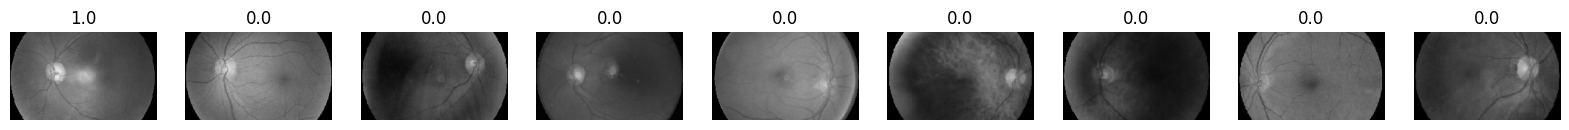

In [36]:
plt.figure(figsize=(20, 10))
for x_batch, y_batch in train_generator:
    for i in range(9):
        plt.subplot(1, 9, i+1)
        plt.imshow(x_batch[i])
        plt.title(y_batch[i])
        plt.axis('off')
    break

Display the class distribution after oversampling and data augmentation

In [37]:
print(f'train 0: {train_generator.classes.count(0)}\ntrain 1: {train_generator.classes.count(1)}')

train 0: 60000
train 1: 15000


In [38]:
imbalance_ratio= (train_generator.classes.count(0)// train_generator.classes.count(1))
print(imbalance_ratio)

4


In [39]:
print(f'val 0: {val_generator.classes.count(0)}\nval 1: {val_generator.classes.count(1)}')

val 0: 8667
val 1: 288


 Model Building<br>
Create a CNN model from scratch

In [40]:
from tensorflow.keras.layers import Input
from keras.applications import VGG16, DenseNet121, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalAveragePooling2D, MaxPool2D
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

def get_model(input_shape):
    input_layer = Input(shape=input_shape)
    base_model = VGG16(include_top=False, input_tensor=input_layer)

    for layer in base_model.layers:
        layer.trainable = False

    x = Flatten()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    output = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['auc'])

    # model = keras.Sequential([
    #     layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    #     layers.AveragePooling2D((2, 2)),
    #     layers.Conv2D(64, (3, 3), activation='relu'),
    #     layers.AveragePooling2D((2, 2)),
    #     layers.Conv2D(128, (3, 3), activation='relu'),
    #     layers.AveragePooling2D((2, 2)),
    #     layers.Flatten(),
    #     layers.Dense(128, activation='relu'),
    #     layers.Dropout(0.1),
    #     layers.Dense(128, activation='relu'),
    #     layers.Dropout(0.1),
    #     layers.Dense(1, activation='sigmoid')
    # ])
    # model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['auc'])
    return model

In [41]:
model = get_model((120,200, 3))
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 120, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 120, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 120, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 60, 100, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 60, 100, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 60, 100, 128)   │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 30, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 30, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 30, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 30, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 15, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 15, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 15, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 15, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 7, 12, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 7, 12, 512)     │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 7, 12, 512)     │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 7, 12, 512)     │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           12

 Total params: 15,911,105 (60.70 MB)

 Trainable params: 1,196,417 (4.56 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Train the model

Without Early stopping

Plot Loss vs Epochs, Accuracy vs Epochs (without early stopping)

In [42]:
weight= {0: 1, 1: imbalance_ratio}

With early stopping

In [43]:
#es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=False, min_delta=0.01)
# mc = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [44]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define early stopping callback
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Define model checkpoint callback to save weights at the end of each epoch
mc = ModelCheckpoint('model_weights_epoch_{epoch:02d}.weights.h5', 
                     monitor='val_loss', 
                     mode='min', 
                     verbose=1, 
                     save_weights_only=True,
                     save_best_only=False)

# Train the model with callbacks
history = model.fit(train_generator, 
                    validation_data=val_generator, 
                    epochs=30, 
                    callbacks=[es, mc], 
                    batch_size=64)



Epoch 1/30


/home/iiitd/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - auc: 0.7679 - loss: 0.4265
Epoch 1: saving model to model_weights_epoch_01.weights.h5
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1700s 1s/step - auc: 0.7679 - loss: 0.4264 - val_auc: 0.8622 - val_loss: 0.1657
Epoch 2/30
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - auc: 0.8694 - loss: 0.3386
Epoch 2: saving model to model_weights_epoch_02.weights.h5
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1714s 1s/step - auc: 0.8694 - loss: 0.3386 - val_auc: 0.8657 - val_loss: 0.1846
Epoch 3/30
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - auc: 0.8859 - loss: 0.3213
Epoch 3: saving model to model_weights_epoch_03.weights.h5
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1718s 1s/step - auc: 0.8859 - loss: 0.3213 - val_auc: 0.8709 - val_loss: 0.1777
Epoch 4/30
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - auc: 0.8946 - loss: 0.3098
Epoch 4: saving model to model_weights_epoch_04.weights.h5
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1721s 1s/step - auc: 0.8946 - loss: 0.3098 - val_auc: 0.8701 - val_loss: 0.1758
Epo

In [45]:
model.save('monitor04model.h5')

In [46]:
best_model= load_model('monitor04model.h5')

In [47]:
def evaluate_model(model, data_generator, dataset_name='Train'):
    predictions = model.predict(data_generator)
    predictions_prob = predictions # Save the probabilities for ROC curve
    predictions = (predictions > 0.5).astype(int)
    true_labels = data_generator.classes
    print(f"\nMetrics for {dataset_name} Data:")
    print("Accuracy: ", accuracy_score(true_labels, predictions))
    print("Precision: ", precision_score(true_labels, predictions))
    print("Recall: ", recall_score(true_labels, predictions))
    print("F1-Score: ", f1_score(true_labels, predictions))
    print("AUC: ", roc_auc_score(true_labels, predictions_prob))
    
    # Confusion Matrix
    cm = confusion_matrix(true_labels, predictions)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {dataset_name}')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, predictions_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {dataset_name}')
    plt.legend(loc="lower right")
    plt.show()

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1522s 1s/step

Metrics for Train Data:
Accuracy:  0.74832
Precision:  0.2153349001175088
Recall:  0.09773333333333334
F1-Score:  0.13444607483492296
AUC:  0.5047321266666667


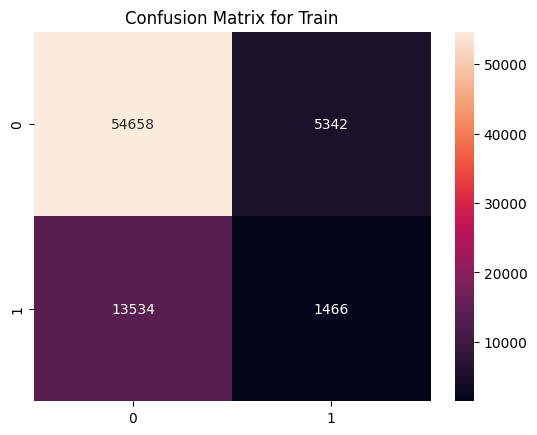

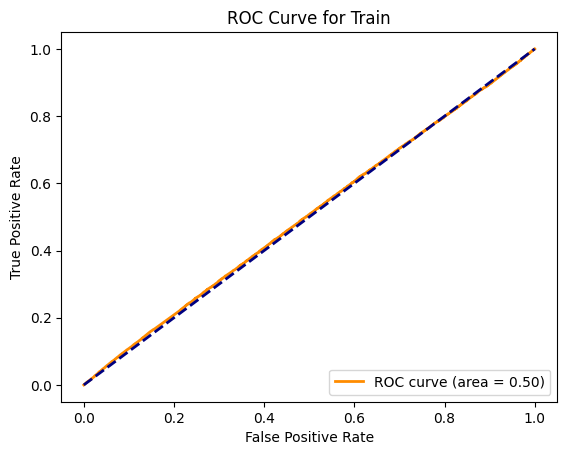

In [48]:
evaluate_model(best_model, train_generator, 'Train')


140/140 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step

Metrics for Validation Data:
Accuracy:  0.9624790619765494
Precision:  0.3867924528301887
Recall:  0.2847222222222222
F1-Score:  0.328
AUC:  0.8497199226311808


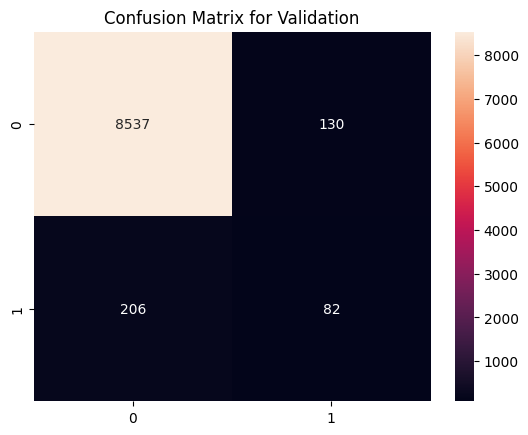

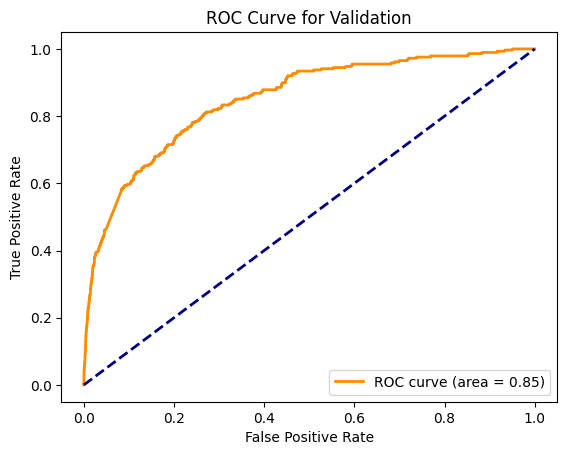

In [49]:
evaluate_model(best_model, val_generator, 'Validation')



/home/iiitd/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/156 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step

Metrics for Test Data:
Accuracy:  0.9629145728643216
Precision:  0.3870967741935484
Recall:  0.2625
F1-Score:  0.31284916201117313
AUC:  0.8556220794392523


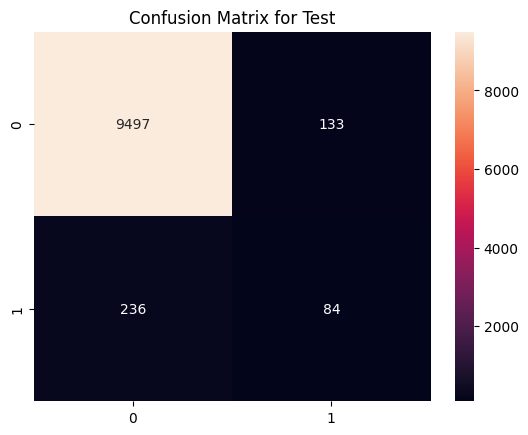

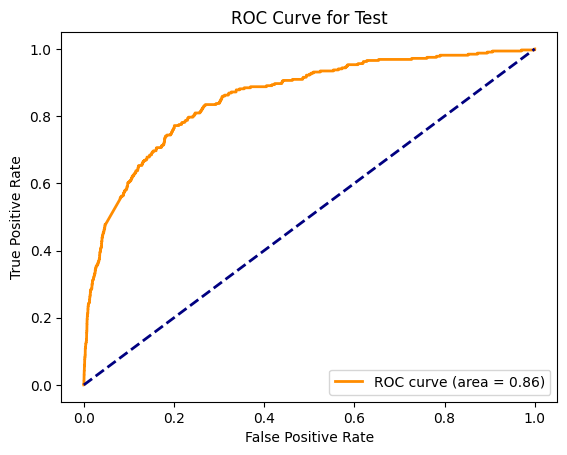

In [52]:
evaluate_model(best_model, test_generator, 'Test')